In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [5]:
result

AIMessage(content="The best place to see orcas in the United States is typically considered to be the Pacific Northwest, specifically the waters around the San Juan Islands in Washington State. The San Juan Islands are located in the Salish Sea, which is home to several resident orca pods. These orcas are often spotted from late spring through early fall, with the peak viewing months being from May to September.\n\nThere are numerous whale-watching tours that operate out of various locations in Washington, including Friday Harbor on San Juan Island, Anacortes, and Seattle. These tours are led by experienced naturalists and provide excellent opportunities to observe orcas in their natural habitat.\n\nIn addition to the San Juan Islands, orcas can sometimes be seen off the coast of other areas in the Pacific Northwest, such as the Strait of Juan de Fuca, the waters around Seattle, and even as far south as Oregon and Northern California. Additionally, there are transient orcas, also known

In [6]:
result.response_metadata

{'token_usage': {'completion_tokens': 252,
  'prompt_tokens': 67,
  'total_tokens': 319,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_cbf1785567',
 'id': 'chatcmpl-CRKBWCfzbjx2N2sGRPFgAhtuP1z4N',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

In [7]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [8]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])

In [9]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_9pXhogPoAvS8yzX3VqxORod3',
  'type': 'tool_call'}]

In [11]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

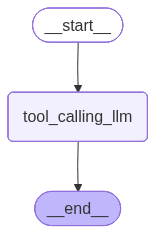

In [12]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_YqzP3FGnasOtDqwcAOd6yETQ)
 Call ID: call_YqzP3FGnasOtDqwcAOd6yETQ
  Args:
    a: 2
    b: 3


In [15]:
def add(a: int, b: int) -> int:
    """Add two integers.

    Args:
        a: First integer.
        b: Second integer.

    Returns:
        The sum of a and b.
    """
    return a + b


def subtract(a: int, b: int) -> int:
    """Subtract b from a.

    Args:`
        a: First integer.
        b: Second integer.

    Returns:
        The difference of a and b.
    """
    return a - b


def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: First integer.
        b: Second integer.

    Returns:
        The product of a and b.
    """
    return a * b


def divide(a: int, b: int) -> float:
    """Divide a by b.

    Args:
        a: Numerator.
        b: Denominator.

    Returns:
        The quotient of a divided by b.

    Raises:
        ValueError: If b is zero.
    """
    if b == 0:
        raise ValueError("Cannot divide by zero.")
    return a / b


llm_with_tools = llm.bind_tools([add, subtract, multiply, divide])
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

messages = graph.invoke({"messages": HumanMessage(content="What is the result of 5 divided by 0")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the result of 5 divided by 0
================================== Ai Message ==================================

The division of any number by zero is undefined in mathematics. Therefore, 5 divided by 0 does not have a defined result.
